In [2]:
import os
import zipfile

# Unzipping the dataset
with zipfile.ZipFile('/content/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')




In [3]:
# Checking the extracted files
extracted_files = os.listdir('/content/dataset/github-Data(2)')
extracted_files

['repositories.csv', 'developers.csv']

In [7]:
import pandas as pd

# Load the datasets
developers_df = pd.read_csv('/content/dataset/github-Data(2)/developers.csv')
repositories_df = pd.read_csv('/content/dataset/github-Data(2)/repositories.csv')
edge_list_df = pd.read_csv('/content/dataset/edgelist.csv')

# Display the first few rows of each dataframe
developers_head = developers_df.head()
repositories_head = repositories_df.head()
edge_list_head = edge_list_df.head()

print("Developers Data:")
print(developers_head)
print("\nRepositories Data:")
print(repositories_head)
print("\nEdgelist Data:")
print(edge_list_head)


# Dimension of the data
print("\nDevelopers Data Shape:", developers_df.shape)
print("Repositories Data Shape:", repositories_df.shape)
print("Edgelist Data Shape:", edge_list_df.shape)

# Statistical Summary
print("\nDevelopers Data Description:")
print(developers_df.describe())
print("\nRepositories Data Description:")
print(repositories_df.describe())

Developers Data:
   dev_id       username                Name  \
0       0       karpathy              Andrej   
1       1  rafaballerini  Rafaella Ballerini   
2       2     llSourcell         Siraj Raval   
3       3    michaelliao        Michael Liao   
4       4         geohot         George Hotz   

                                                 Bio              Company  \
0  I like to train Deep Neural Nets on large data...                  NaN   
1  Desenvolvedora de software e criadora de conte...                  NaN   
2  subscribe to my youtube channel! \r\nwww.youtu...                  NaN   
3                                  Crypto developer.                  NaN   
4                  We will commoditize the petaflop.  @commaai @tinygrad    

                 Location  Public Repositories  Followers  Following  \
0                Stanford                   49      49935          7   
1  Santa Catarina, Brasil                   47      43740         28   
2       San Fra

In [8]:
developers = developers_df
repositories = repositories_df
edgelist = edge_list_df


In [9]:
# Check missing values in each dataset
print("Missing Values in Developers Data:")
print(developers.isnull().sum())
print("\nMissing Values in Repositories Data:")
print(repositories.isnull().sum())
print("\nMissing Values in Edgelist Data:")
print(edgelist.isnull().sum())

# Fill missing values in 'Company' and 'status' columns of developers data with 'Unknown'
developers['Company'].fillna('Unknown', inplace=True)
developers['status'].fillna('Unknown', inplace=True)


Missing Values in Developers Data:
dev_id                      0
username                    0
Name                       64
Bio                       252
Company                   416
Location                  243
Public Repositories         0
Followers                   0
Following                   0
listOfPinnedRepos           0
starredRepoCount            0
yearly_contributions        0
repos_name_list             0
starred_repos_nameList      0
followers_name              0
following_names             0
achievements                0
status                    557
dtype: int64

Missing Values in Repositories Data:
repo_id                0
owner_username         0
repo_name              0
description           78
created_at             0
pushed_at              0
size                   0
stargazers_count       0
has_projects           0
has_wiki               0
has_pages              0
forks_count            0
open_issues_count      0
license                0
is_template            0

In [10]:
developers['Name'].fillna('Unknown', inplace=True)
developers['Bio'].fillna('Unknown', inplace=True)
developers['Company'].fillna('Not Specified', inplace=True)
developers['Location'].fillna('Unknown', inplace=True)
developers['status'].fillna('Unknown', inplace=True)


In [11]:
repositories['description'].fillna('No Description', inplace=True)
repositories['readme'].fillna('No Readme', inplace=True)


In [12]:
edgelist['isTopContributor'].fillna(False, inplace=True)


In [13]:
# Check missing values in each dataset again
print("Missing Values in Developers Data:")
print(developers.isnull().sum())
print("\nMissing Values in Repositories Data:")
print(repositories.isnull().sum())
print("\nMissing Values in Edgelist Data:")
print(edgelist.isnull().sum())


Missing Values in Developers Data:
dev_id                    0
username                  0
Name                      0
Bio                       0
Company                   0
Location                  0
Public Repositories       0
Followers                 0
Following                 0
listOfPinnedRepos         0
starredRepoCount          0
yearly_contributions      0
repos_name_list           0
starred_repos_nameList    0
followers_name            0
following_names           0
achievements              0
status                    0
dtype: int64

Missing Values in Repositories Data:
repo_id               0
owner_username        0
repo_name             0
description           0
created_at            0
pushed_at             0
size                  0
stargazers_count      0
has_projects          0
has_wiki              0
has_pages             0
forks_count           0
open_issues_count     0
license               0
is_template           0
topics                0
watching              0
co

In [14]:
# Developers basic statistics
print(developers.describe(include='all'))


             dev_id  username     Name      Bio  Company Location  \
count    990.000000       990      990      990      990      990   
unique          NaN       990      927      736      528      437   
top             NaN  karpathy  Unknown  Unknown  Unknown  Unknown   
freq            NaN         1       64      252      416      243   
mean     500.344444       NaN      NaN      NaN      NaN      NaN   
std      294.214585       NaN      NaN      NaN      NaN      NaN   
min        0.000000       NaN      NaN      NaN      NaN      NaN   
25%      247.250000       NaN      NaN      NaN      NaN      NaN   
50%      494.500000       NaN      NaN      NaN      NaN      NaN   
75%      741.750000       NaN      NaN      NaN      NaN      NaN   
max     1019.000000       NaN      NaN      NaN      NaN      NaN   

        Public Repositories     Followers      Following  \
count            990.000000    990.000000     990.000000   
unique                  NaN           NaN          

In [15]:
# Repositories basic statistics
print(repositories.describe(include='all'))


            repo_id owner_username repo_name     description  \
count   2954.000000           2954      2954            2954   
unique          NaN           1111      2923            2870   
top             NaN         google  dotfiles  No Description   
freq            NaN              9         7              78   
mean    1476.500000            NaN       NaN             NaN   
std      852.890673            NaN       NaN             NaN   
min        0.000000            NaN       NaN             NaN   
25%      738.250000            NaN       NaN             NaN   
50%     1476.500000            NaN       NaN             NaN   
75%     2214.750000            NaN       NaN             NaN   
max     2953.000000            NaN       NaN             NaN   

                 created_at            pushed_at          size  \
count                  2954                 2954  2.954000e+03   
unique                 2954                 2953           NaN   
top     2022-12-28 00:51:12  2023

In [16]:
# Edgelist basic statistics
print(edgelist.describe(include='all'))


       isForked isTopContributor      repo_id       dev_id
count      3050             3050  3050.000000  3050.000000
unique        2                2          NaN          NaN
top       False             True          NaN          NaN
freq       2529             2812          NaN          NaN
mean        NaN              NaN  1454.457049   490.952131
std         NaN              NaN   858.278585   294.216248
min         NaN              NaN     0.000000     0.000000
25%         NaN              NaN   708.250000   243.250000
50%         NaN              NaN  1446.500000   472.000000
75%         NaN              NaN  2195.750000   737.000000
max         NaN              NaN  2953.000000  1019.000000


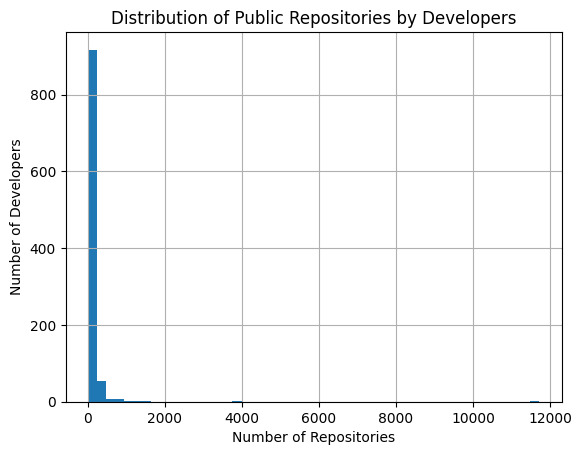

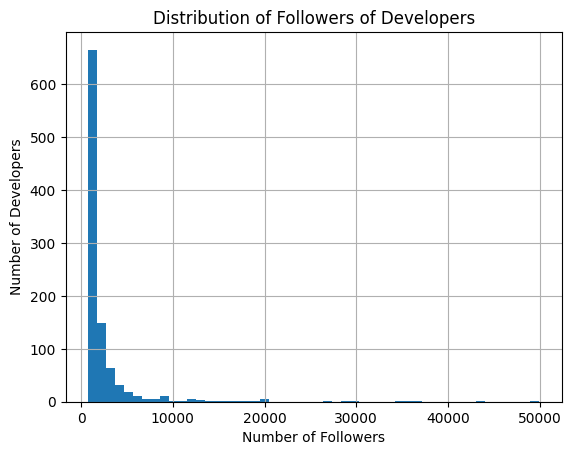

In [18]:
import matplotlib.pyplot as plt

# Distribution of number of public repositories by developers
developers['Public Repositories'].hist(bins=50)
plt.title('Distribution of Public Repositories by Developers')
plt.xlabel('Number of Repositories')
plt.ylabel('Number of Developers')
plt.show()

# Distribution of number of followers of developers
developers['Followers'].hist(bins=50)
plt.title('Distribution of Followers of Developers')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Developers')
plt.show()


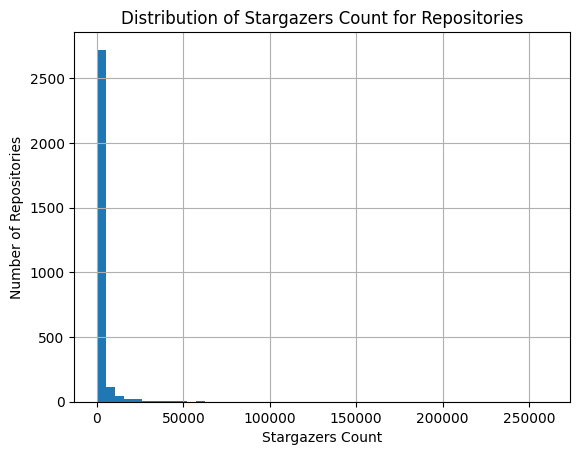

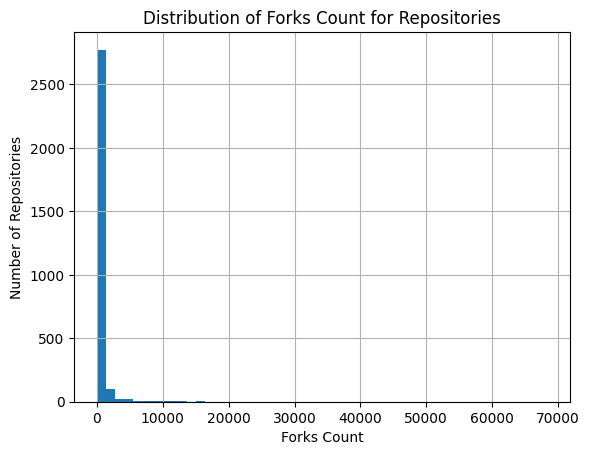

In [19]:
# Distribution of stargazers count for repositories
repositories['stargazers_count'].hist(bins=50)
plt.title('Distribution of Stargazers Count for Repositories')
plt.xlabel('Stargazers Count')
plt.ylabel('Number of Repositories')
plt.show()

# Distribution of forks count for repositories
repositories['forks_count'].hist(bins=50)
plt.title('Distribution of Forks Count for Repositories')
plt.xlabel('Forks Count')
plt.ylabel('Number of Repositories')
plt.show()


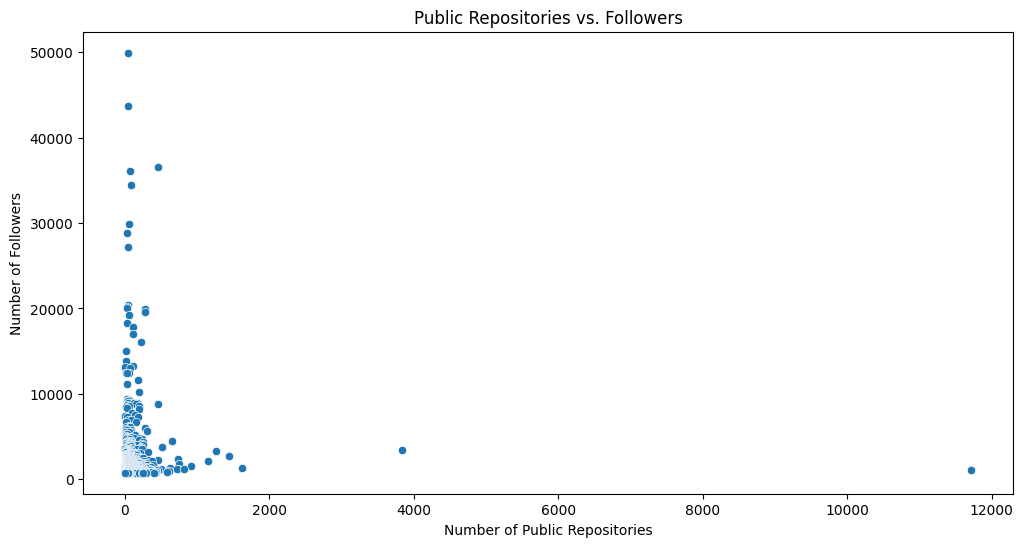

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=developers, x='Public Repositories', y='Followers')
plt.title('Public Repositories vs. Followers')
plt.xlabel('Number of Public Repositories')
plt.ylabel('Number of Followers')
plt.show()


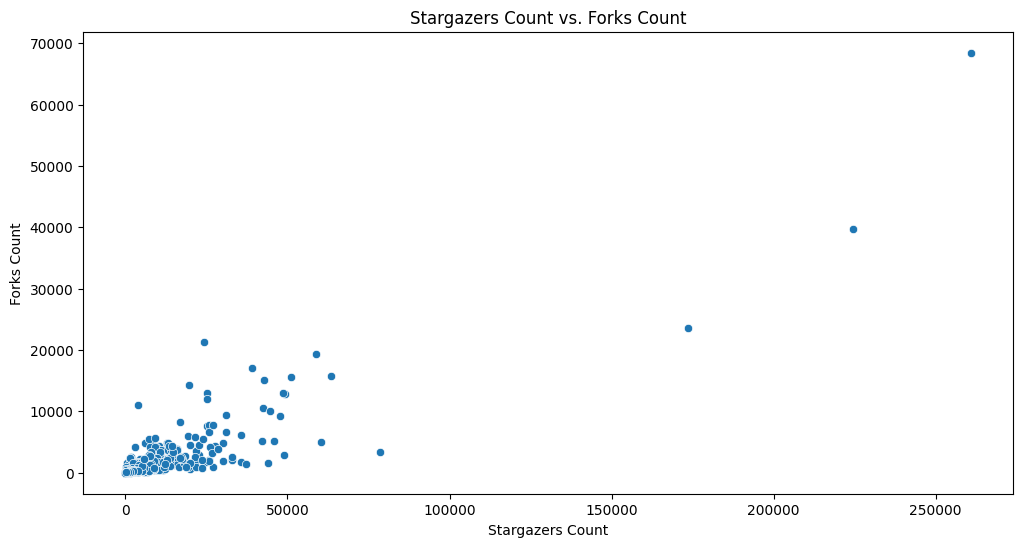

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=repositories, x='stargazers_count', y='forks_count')
plt.title('Stargazers Count vs. Forks Count')
plt.xlabel('Stargazers Count')
plt.ylabel('Forks Count')
plt.show()


In [22]:
# Merging the datasets
merged_data = edgelist.merge(developers, on='dev_id').merge(repositories, on='repo_id')

# Filtering top contributors
top_contributors = merged_data[merged_data['isTopContributor'] == True]

# Sorting by stargazers_count to get top repositories
top_repos_by_contributors = top_contributors.sort_values(by='stargazers_count', ascending=False)


In [27]:
import re

# Extracting numbers from the yearly_contributions column
developers['yearly_contributions'] = developers['yearly_contributions'].apply(lambda x: int(re.search(r'\d+', x.replace(',', '')).group()))

# Recalculate active_rate
developers['active_rate'] = developers['yearly_contributions'].apply(lambda x: 'High' if x > 500 else 'Medium' if x > 100 else 'Low')

# Calculate follower_following_ratio
developers['follower_following_ratio'] = developers['Followers'] / developers['Following'].replace(0, 1)


In [28]:
developers = pd.get_dummies(developers, columns=['active_rate'], drop_first=True)


In [29]:
import numpy as np

repositories['log_stargazers_count'] = np.log1p(repositories['stargazers_count'])
repositories['log_forks_count'] = np.log1p(repositories['forks_count'])


In [30]:
from sklearn.model_selection import train_test_split

# For demonstration purposes, let's consider predicting 'stargazers_count' based on other features in the repository dataset.
X = repositories.drop('stargazers_count', axis=1)
y = repositories['stargazers_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
X_train, X_test, y_train, y_test

(      repo_id  owner_username                            repo_name  \
 2222     2222     anitagraser                         movingpandas   
 1491     1491        fafhrd91                                 ntex   
 2862     2862         hanc00l                              nemo_go   
 358       358        wangshub                             RL-Stock   
 807       807  bhattbhavesh91  cowin-vaccination-slot-availability   
 ...       ...             ...                                  ...   
 1638     1638      XTeam-Wing             Hunting-Active-Directory   
 1095     1095   RubensZimbres                            Repo-2022   
 1130     1130  LukeMathWalker                           cargo-chef   
 1294     1294           PyCQA                               flake8   
 860       860     ubernostrum                  django-contact-form   
 
                                             description           created_at  \
 2222  Implementation of Trajectory classes and funct...  2018-12

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train[['size', 'contributors_count', 'commits_count', 'watching']], y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test[['size', 'contributors_count', 'commits_count', 'watching']])

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(991.4154205570949, 8860546.548733616, 0.9236018878251254)

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data preparation
X_train_transformed = X_train.drop(columns=['owner_username', 'repo_name', 'description', 'created_at', 'pushed_at', 'license', 'topics', 'languages', 'readme'])
X_test_transformed = X_test.drop(columns=['owner_username', 'repo_name', 'description', 'created_at', 'pushed_at', 'license', 'topics', 'languages', 'readme'])

# Initialize models
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42)

# Train models
dt_reg.fit(X_train_transformed, y_train)
rf_reg.fit(X_train_transformed, y_train)
xgb_reg.fit(X_train_transformed, y_train)

# Predictions
dt_preds = dt_reg.predict(X_test_transformed)
rf_preds = rf_reg.predict(X_test_transformed)
xgb_preds = xgb_reg.predict(X_test_transformed)

# Evaluation
models = ["Decision Tree", "Random Forest", "XGBoost"]
predictions = [dt_preds, rf_preds, xgb_preds]

results = {}
for model, pred in zip(models, predictions):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    results[model] = {"MAE": mae, "MSE": mse, "R2": r2}

results


{'Decision Tree': {'MAE': 149.1082910321489,
  'MSE': 4815616.66497462,
  'R2': 0.9584784053513596},
 'Random Forest': {'MAE': 103.49780033840948,
  'MSE': 3628046.155989509,
  'R2': 0.9687179706492797},
 'XGBoost': {'MAE': 551.584062075567,
  'MSE': 67711524.2739449,
  'R2': 0.4161722870524349}}